In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns

#### 加载数据

In [2]:
os.chdir('D:/DataSet/PRD')
pr = pd.read_csv('total_amt.csv')
pr['report_date'] = pd.to_datetime(pr['report_date'],
                                        format='%Y-%m-%d')
pr = pr.set_index('report_date')

In [3]:
pr2 = pr.loc['2014-04':,:].copy()

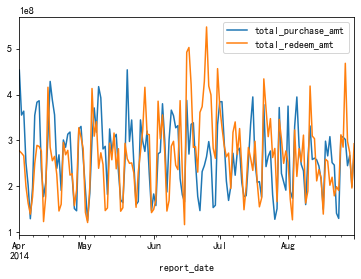

In [4]:
pr2.plot()

#### 平稳性检验

In [5]:
import statsmodels.api as sm
adfp = sm.tsa.adfuller(pr2['total_purchase_amt'])[1]
kpssp = sm.tsa.kpss(pr2['total_purchase_amt'],nlags='auto')[1]
adfp, kpssp

(0.03415752696915114, 0.03967629854388505)

In [18]:
#差分
diff_p = pr2['total_purchase_amt'].diff().dropna()
sm.tsa.kpss(diff_p.dropna(),nlags='auto')[1]

d:\softwares\python\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


0.1

In [38]:
sm.tsa.adfuller(pr2['total_redeem_amt'])[1]

0.200748426904442

In [39]:
diff_r = pr2['total_redeem_amt'].diff().dropna()

In [41]:
adfr = sm.tsa.adfuller(diff_r)[1]
kpssr = sm.tsa.kpss(diff_r,nlags='auto')[1]
adfr, kpssr

d:\softwares\python\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(4.119453406562348e-23, 0.1)

#### 自相关系数和偏相关系数

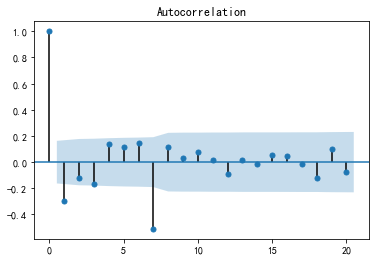

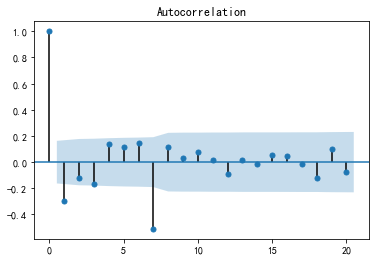

In [19]:
sm.tsa.graphics.plot_acf(diff_p.diff(7).dropna(),
                         lags=20)

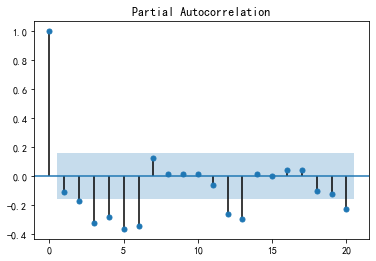

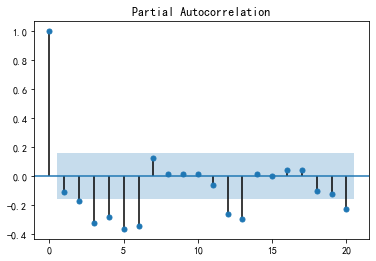

In [21]:
sm.tsa.graphics.plot_pacf(diff_p.dropna(),lags=20)

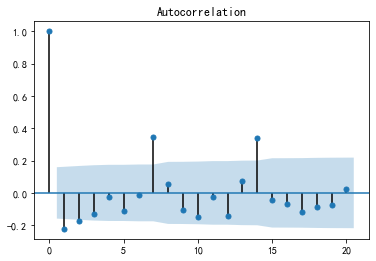

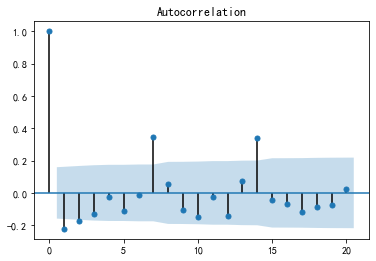

In [42]:
sm.tsa.graphics.plot_acf(diff_r,lags=20)

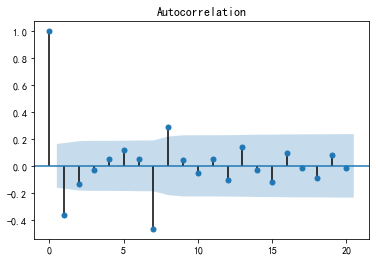

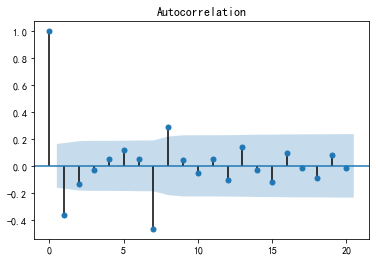

In [43]:
sm.tsa.graphics.plot_acf(diff_r.diff(7).dropna(),lags=20)

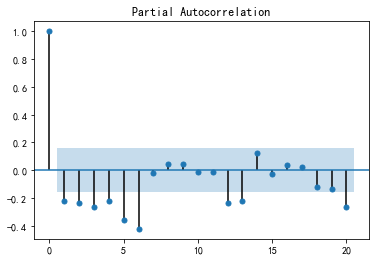

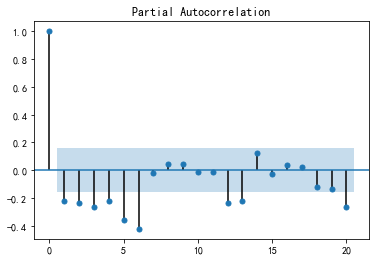

In [46]:
sm.tsa.graphics.plot_pacf(diff_r.dropna(),lags=20)

In [29]:
res = sm.tsa.arima.ARIMA(pr2['total_purchase_amt'],
                         seasonal_order=(1,1,1,7)).fit()

d:\softwares\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\softwares\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\softwares\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [32]:
pred = res.forecast(steps=30)

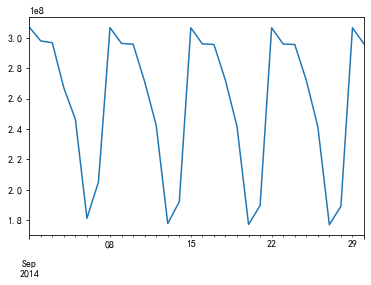

In [33]:
pred.plot()

In [62]:
res1 = sm.tsa.arima.ARIMA(pr2['total_redeem_amt'],
                         seasonal_order=(1,1,1,7)).fit()

d:\softwares\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\softwares\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\softwares\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


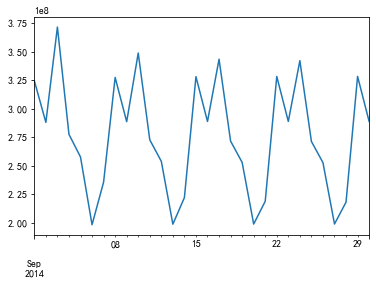

In [63]:
pred1 = res1.forecast(30)
pred1.plot()

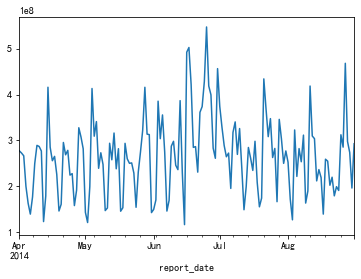

In [65]:
pr2['total_redeem_amt'].plot()

In [66]:
def to_result(purchase, redeem):
    report_date=list(range(20140901,20140931))
    sub=pd.DataFrame()
    sub['purchase']=purchase
    sub['redeem']=redeem
    sub=sub.reset_index()
    sub['index']=report_date
    sub=sub.rename(columns={'index':'report_date'})
    sub[['purchase','redeem']]=sub[['purchase','redeem']].astype(np.int64)
    sub=sub.set_index(['report_date'])
    sub.to_csv('tc_comp_predict_table.csv',sep=',')
    
to_result(pred, pred1)

In [74]:
df = pd.read_clipboard()

In [71]:
df = df.rename(columns={'Unnamed: 1':'purchase','Unnamed: 2':'redeem'})

In [76]:
sub=df.set_index(['report_date'])
sub.to_csv('tc_comp_predict_table.csv',sep=',')

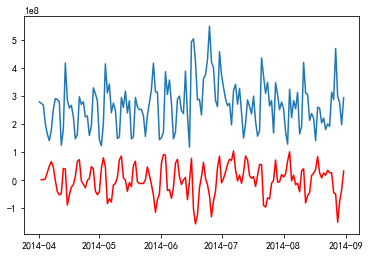

In [38]:
model = sm.tsa.ARIMA(pr2['total_redeem_amt'], 
                     order=(2,1,2))
res = model.fit(disp=-1)
plt.plot(pr2['total_redeem_amt'])
plt.plot(res.fittedvalues, color='r')

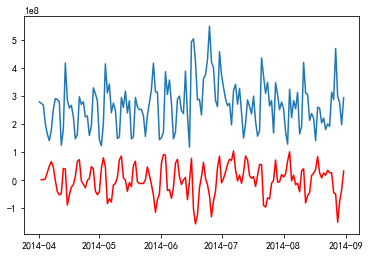

In [37]:
model1 = sm.tsa.ARMA(pr2['total_redeem_amt'].diff(1).dropna(), 
                     order=(2,2))
res1 = model1.fit()
plt.plot(pr2['total_redeem_amt'])
plt.plot(res1.fittedvalues, color='r')

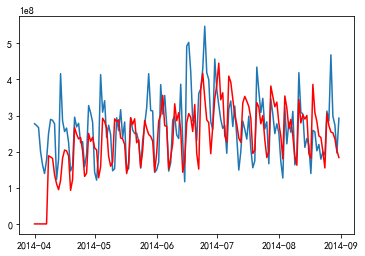

In [39]:
model = sm.tsa.arima.ARIMA(pr2['total_redeem_amt'], 
                     seasonal_order=(2,1,2,7))
res = model.fit()
plt.plot(pr2['total_redeem_amt'])
plt.plot(res.fittedvalues, color='r')

In [ ]:
res.predict(start='2014-09-01',end='2014-09-30')